# Qoffee Maker Walkthrough

In [17]:
import numpy as np
from qiskit import *
from qiskit_aer import *             
from qiskit_ibm_runtime import *
from qiskit.visualization import plot_histogram

In [18]:
# Qubit number and simulator initialization
num_qubits = 3
simulator = AerSimulator()

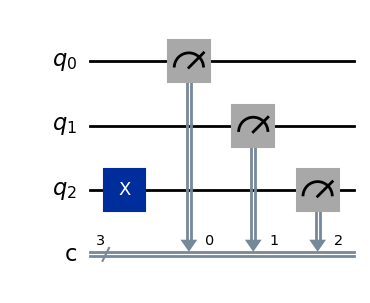

In [19]:
# Question 1 circuit
circ1 = QuantumCircuit(num_qubits, num_qubits)
circ1.x(2)
circ1.measure(range(num_qubits), range(num_qubits))
circ1.draw('mpl')

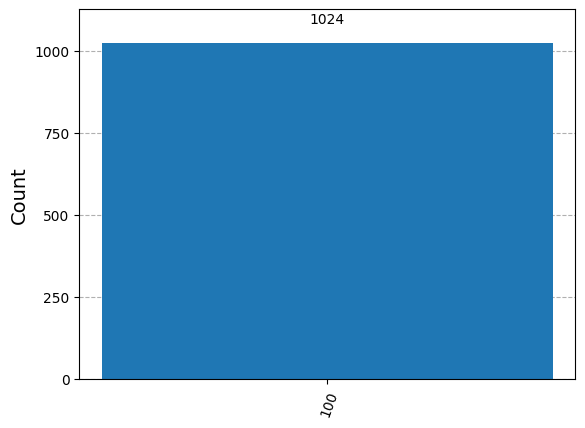

In [20]:
# Question 1 histogram plot
compiled_circuit1 = transpile(circ1, simulator)
result1 = simulator.run(compiled_circuit1, shots = 1024).result()
counts1 = result1.get_counts()
plot_histogram(counts1)

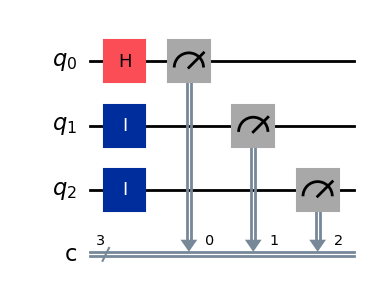

In [21]:
# Question 2 circuit
circ2 = QuantumCircuit(num_qubits, num_qubits)
circ2.h(0)
circ2.id(1)
circ2.id(2)
circ2.measure(range(num_qubits), range(num_qubits))
circ2.draw('mpl')

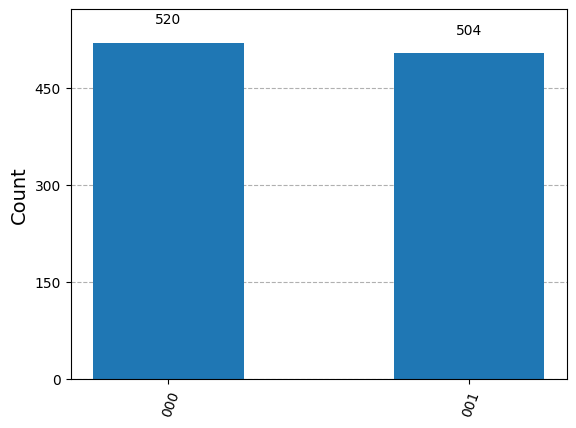

In [22]:
# Question 2 histogram plot
compiled_circuit2 = transpile(circ2, simulator)
result2 = simulator.run(compiled_circuit2, shots = 1024).result()
counts2 = result2.get_counts()
plot_histogram(counts2)

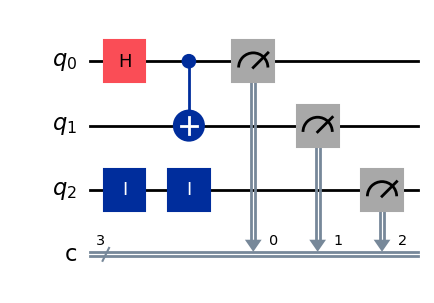

In [23]:
# Question 3 circuit
circ3 = QuantumCircuit(num_qubits, num_qubits)
circ3.h(0)
circ3.cx(0, 1)
circ3.id(2)
circ3.id(2)
circ3.measure(range(num_qubits), range(num_qubits))
circ3.draw('mpl')

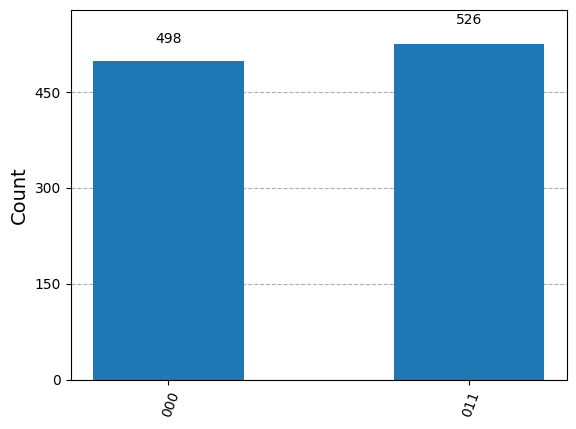

In [24]:
# Question 3 histogram plot
compiled_circuit3 = transpile(circ3, simulator)
result3 = simulator.run(compiled_circuit3, shots = 1024).result()
counts3 = result3.get_counts()
plot_histogram(counts3)

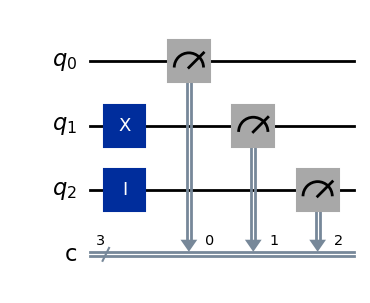

In [25]:
# Question 4 circuit
circ4 = QuantumCircuit(num_qubits, num_qubits)
circ4.x(1)
circ4.id(2)
circ4.measure(range(num_qubits), range(num_qubits))
circ4.draw('mpl')

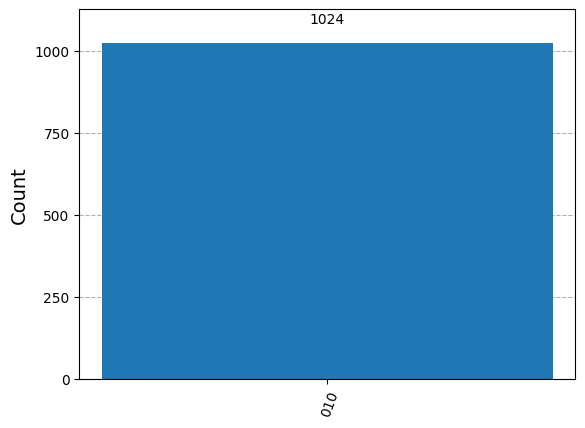

In [26]:
# Question 4 histogram plot
compiled_circuit4 = transpile(circ4, simulator)
result4 = simulator.run(compiled_circuit4, shots = 1024).result()
counts4 = result4.get_counts()
plot_histogram(counts4)

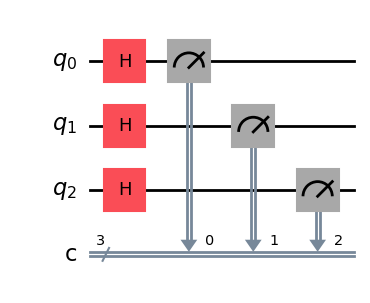

In [27]:
# Question 5 circuit
circ5 = QuantumCircuit(num_qubits, num_qubits)
circ5.h(range(num_qubits))
circ5.measure(range(num_qubits), range(num_qubits))
circ5.draw('mpl')

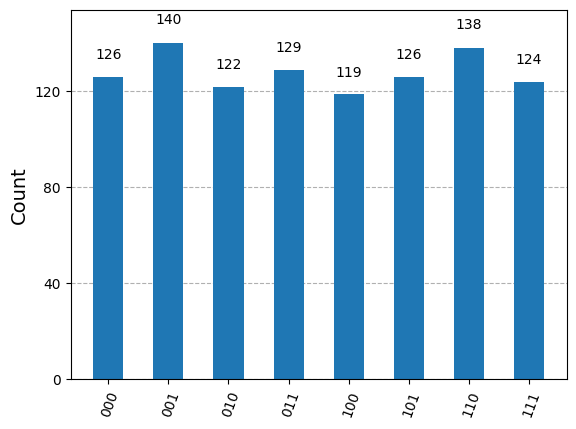

In [28]:
# Question 5 histogram plot
compiled_circuit5 = transpile(circ5, simulator)
result5 = simulator.run(compiled_circuit5, shots = 1024).result()
counts5 = result5.get_counts()
plot_histogram(counts5)

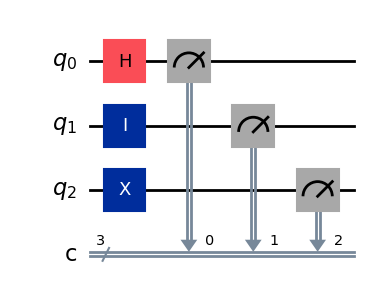

In [29]:
# Question 6 circuit
circ6 = QuantumCircuit(num_qubits, num_qubits)
circ6.h(0)
circ6.x(2)
circ6.id(1)
circ6.measure(range(num_qubits), range(num_qubits))
circ6.draw('mpl')

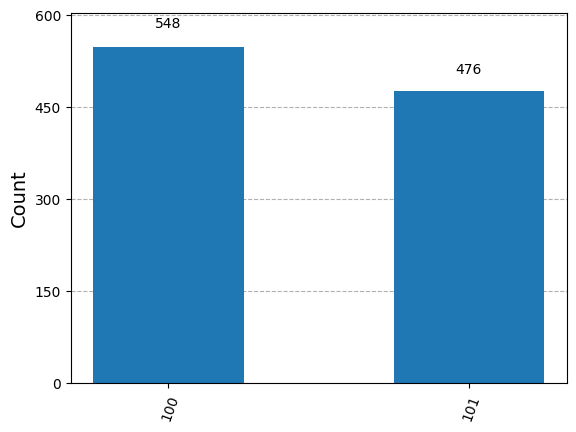

In [30]:
# Question 6 histogram plot
compiled_circuit6 = transpile(circ6, simulator)
result6 = simulator.run(compiled_circuit6, shots = 1024).result()
counts6 = result6.get_counts()
plot_histogram(counts6)

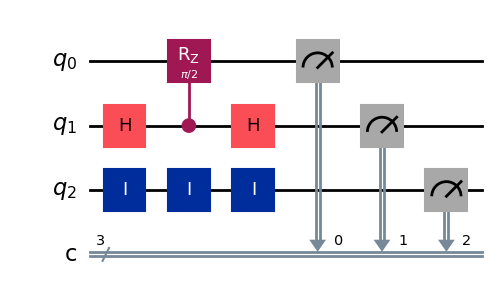

In [31]:
# Question 7 circuit
circ7 = QuantumCircuit(num_qubits, num_qubits)
circ7.h(1)
circ7.crz(np.pi / 2, 1, 0)
circ7.h(1)
circ7.id(2)
circ7.id(2)
circ7.id(2)
circ7.measure(range(num_qubits), range(num_qubits))
circ7.draw('mpl')

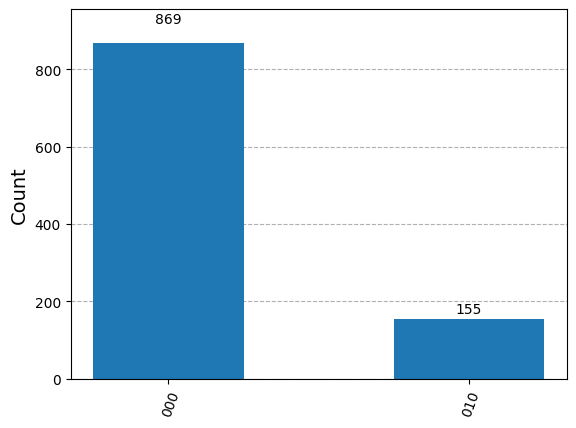

In [32]:
# Question 7 histogram plot
compiled_circuit7 = transpile(circ7, simulator)
result7 = simulator.run(compiled_circuit7, shots = 1024).result()
counts7 = result7.get_counts()
plot_histogram(counts7)

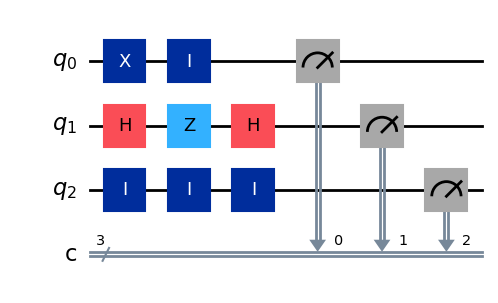

In [33]:
# Question 8 circuit
circ8 = QuantumCircuit(num_qubits, num_qubits)
circ8.x(0)
circ8.id(0)
circ8.h(1)
circ8.z(1)
circ8.h(1)
circ8.id(2)
circ8.id(2)
circ8.id(2)
circ8.measure(range(num_qubits), range(num_qubits))
circ8.draw('mpl')

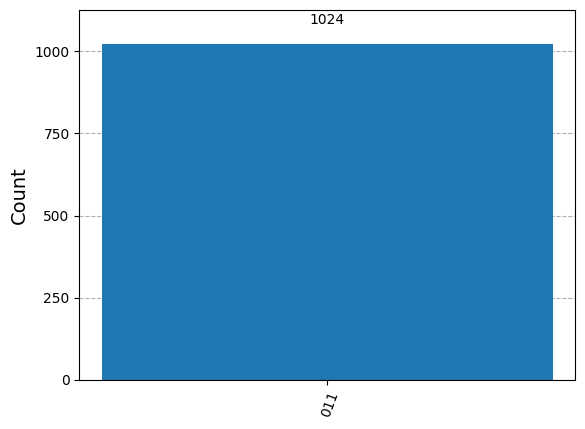

In [34]:
# Question 8 histogram plot
compiled_circuit8 = transpile(circ8, simulator)
result8 = simulator.run(compiled_circuit8, shots = 1024).result()
counts8 = result8.get_counts()
plot_histogram(counts8)

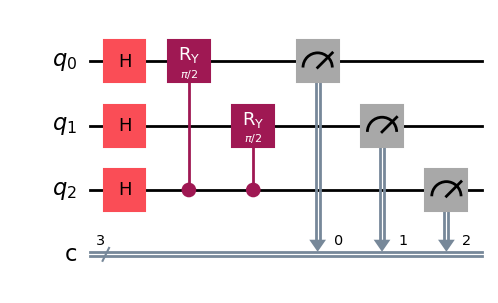

In [35]:
# # Question 9 circuit
circ9 = QuantumCircuit(num_qubits, num_qubits)
circ9.h(range(num_qubits))
circ9.cry(np.pi / 2, 2, 0)
circ9.cry(np.pi / 2, 2, 1)
circ9.measure(range(num_qubits), range(num_qubits))
circ9.draw('mpl')

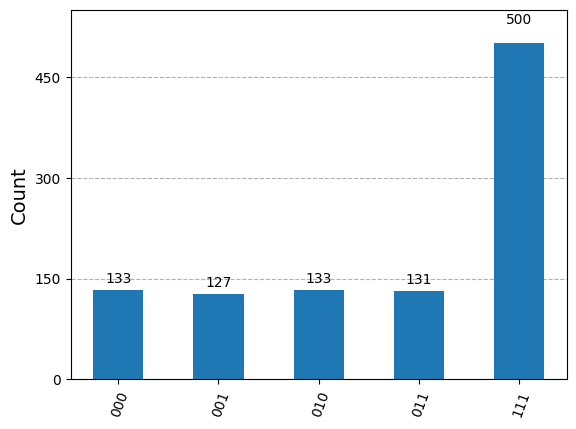

In [36]:
# Question 9 histogram plot
compiled_circuit9 = transpile(circ9, simulator)
result9 = simulator.run(compiled_circuit9, shots = 1024).result()
counts9 = result9.get_counts()
plot_histogram(counts9)

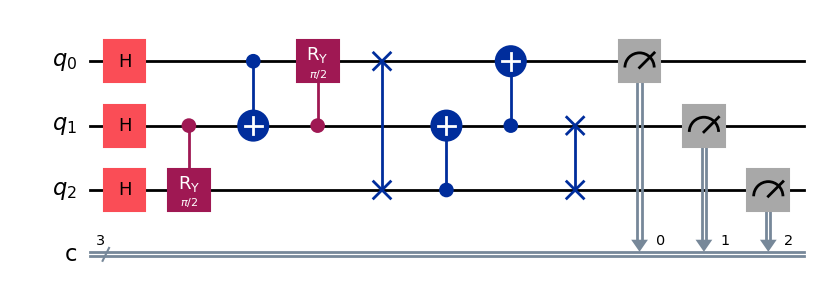

In [37]:
# Question 10 circuit
circ10 = QuantumCircuit(num_qubits, num_qubits)
circ10.h(range(num_qubits))
circ10.cry(np.pi / 2, 1, 2)
circ10.cx(0, 1)
circ10.cry(np.pi / 2, 1, 0)
circ10.swap(0, 2)
circ10.cx(2, 1)
circ10.cx(1, 0)
circ10.swap(1, 2)
circ10.measure(range(num_qubits), range(num_qubits))
circ10.draw('mpl')

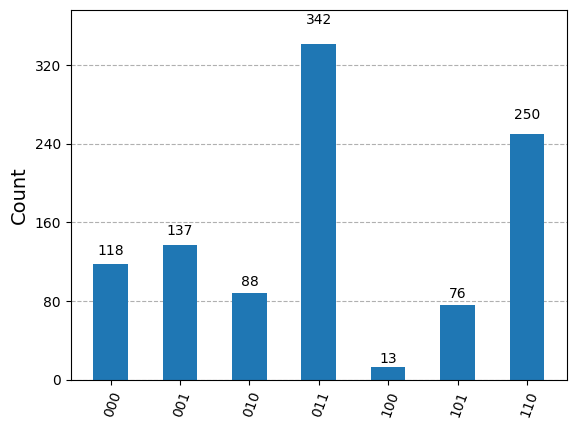

In [38]:
# Question 10 histogram plot
compiled_circuit10 = transpile(circ10, simulator)
result10 = simulator.run(compiled_circuit10, shots = 1024).result()
counts10 = result10.get_counts()
plot_histogram(counts10)

## Running on a real quantum computer

In order to use a real quantum computer, you will need to obtain your API token from quantum.ibm.com.
If you didn't make an account during the IBM Composer step, you will need to make one now.

In the top right corner, you can copy your API token and paste it into the API token variable down below.

To run the circuits, uncomment each code block by selecting the code below the question number and pressing "CNRL + /" on Windows and "CMND + /" on Mac

In [ ]:
QiskitRuntimeService.save_account(channel = 'ibm_quantum', 
                                  token = 'API token',
                                  overwrite = True, 
                                  set_as_default = True)
service = QiskitRuntimeService(instance = "ibm-q/open/main")
least_busy_backend = service.least_busy()
backend = service.backend(least_busy_backend.name)
pm = generate_preset_pass_manager(backend = least_busy_backend, optimization_level = 3)

QUEUED
PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=3>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2024-11-11 18:18:12', stop='2024-11-11 18:18:28', size=1024>)])}, 'version': 2})


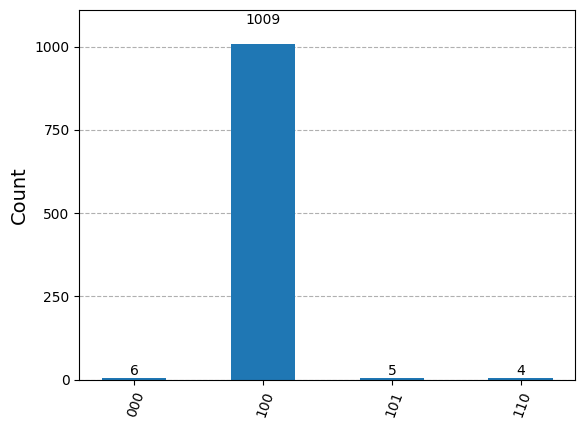

In [ ]:
# Question 1 real quantum machine histogram plot
isa_circuit1 = pm.run(circ1)
with Session(backend = least_busy_backend) as session:
    sampler = Sampler()
    job = sampler.run([isa_circuit1], shots = 1024)
    print(job.status())
    print(job.result())
    counts1 = job.result()[0].data.c.get_counts()

plot_histogram(counts1)

QUEUED
PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=3>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2024-11-11 18:23:01', stop='2024-11-11 18:23:16', size=1024>)])}, 'version': 2})


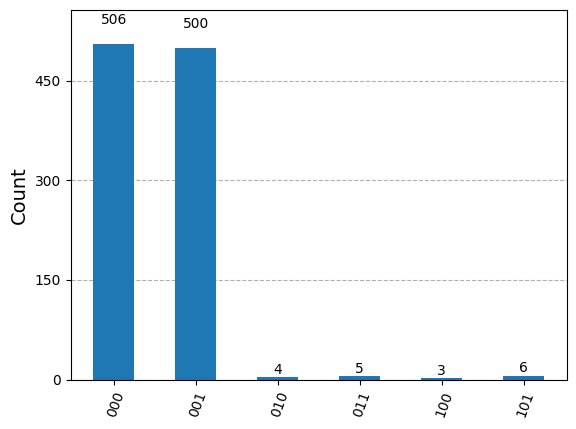

In [ ]:
# Question 2 real quantum machine histogram plot
isa_circuit2 = pm.run(circ2)
with Session(backend = least_busy_backend) as session:
    sampler = Sampler()
    job = sampler.run([isa_circuit2], shots = 1024)
    print(job.status())
    print(job.result())
    counts2 = job.result()[0].data.c.get_counts()

plot_histogram(counts2)

QUEUED
PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=3>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2024-11-09 23:45:32', stop='2024-11-09 23:45:45', size=1024>)])}, 'version': 2})


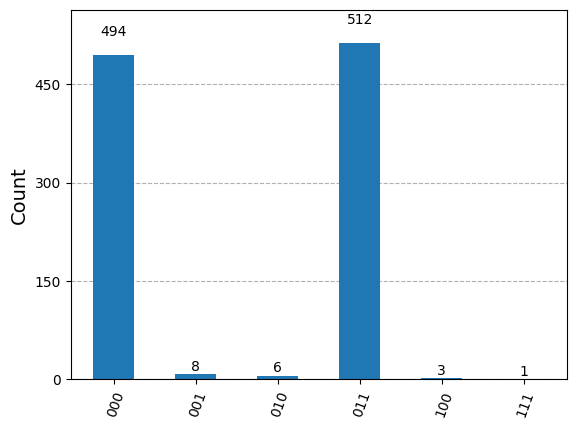

In [ ]:
# Question 3 real quantum machine histogram plot
isa_circuit3 = pm.run(circ3)
with Session(backend = least_busy_backend) as session:
    sampler = Sampler()
    job = sampler.run([isa_circuit3], shots = 1024)
    print(job.status())
    print(job.result())
    counts3 = job.result()[0].data.c.get_counts()

plot_histogram(counts3)

QUEUED
PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=3>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2024-11-09 23:46:08', stop='2024-11-09 23:46:19', size=1024>)])}, 'version': 2})


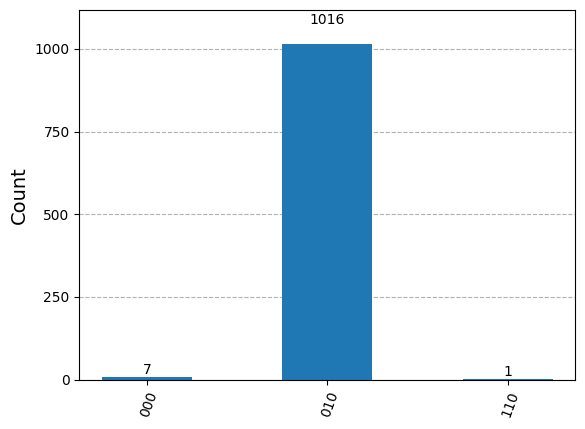

In [ ]:
# Question 4 real quantum machine histogram plot
isa_circuit4 = pm.run(circ4)
with Session(backend = least_busy_backend) as session:
    sampler = Sampler()
    job = sampler.run([isa_circuit4], shots = 1024)
    print(job.status())
    print(job.result())
    counts4 = job.result()[0].data.c.get_counts()

plot_histogram(counts4)

QUEUED
PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=3>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2024-11-09 23:46:36', stop='2024-11-09 23:46:50', size=1024>)])}, 'version': 2})


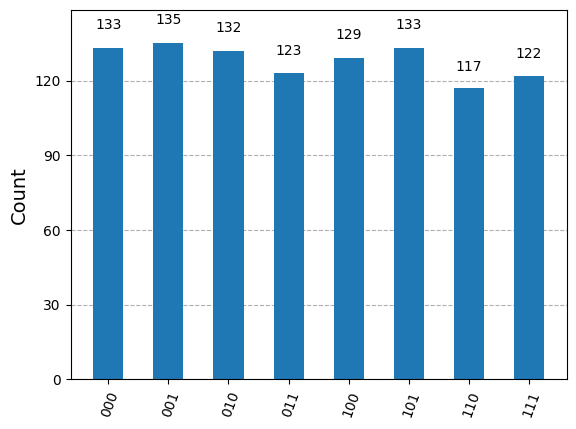

In [ ]:
# Question 5 real quantum machine histogram plot
isa_circuit5 = pm.run(circ5)
with Session(backend = least_busy_backend) as session:
    sampler = Sampler()
    job = sampler.run([isa_circuit5], shots = 1024)
    print(job.status())
    print(job.result())
    counts5 = job.result()[0].data.c.get_counts()

plot_histogram(counts5)

QUEUED
PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=3>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2024-11-09 23:47:05', stop='2024-11-09 23:47:18', size=1024>)])}, 'version': 2})


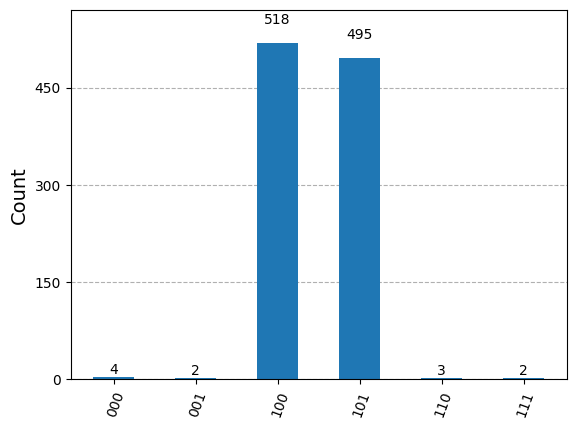

In [ ]:
# Question 6 real quantum machine histogram plot
isa_circuit6 = pm.run(circ6)
with Session(backend = least_busy_backend) as session:
    sampler = Sampler()
    job = sampler.run([isa_circuit6], shots = 1024)
    print(job.status())
    print(job.result())
    counts6 = job.result()[0].data.c.get_counts()

plot_histogram(counts6)

QUEUED
PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=3>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2024-11-09 23:47:30', stop='2024-11-09 23:47:41', size=1024>)])}, 'version': 2})


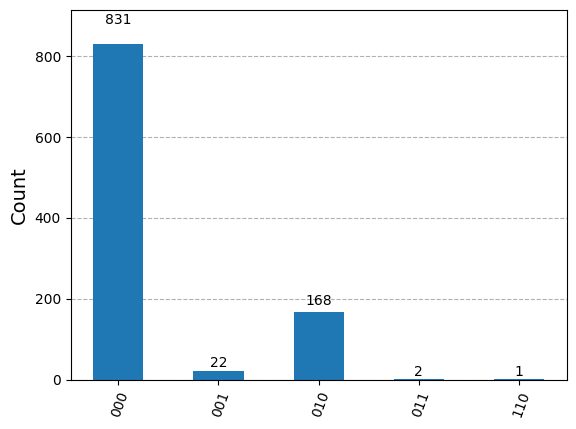

In [ ]:
# Question 7 real quantum machine histogram plot
isa_circuit7 = pm.run(circ7)
with Session(backend = least_busy_backend) as session:
    sampler = Sampler()
    job = sampler.run([isa_circuit7], shots = 1024)
    print(job.status())
    print(job.result())
    counts7 = job.result()[0].data.c.get_counts()

plot_histogram(counts7)

QUEUED
PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=3>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2024-11-09 23:47:53', stop='2024-11-09 23:48:07', size=1024>)])}, 'version': 2})


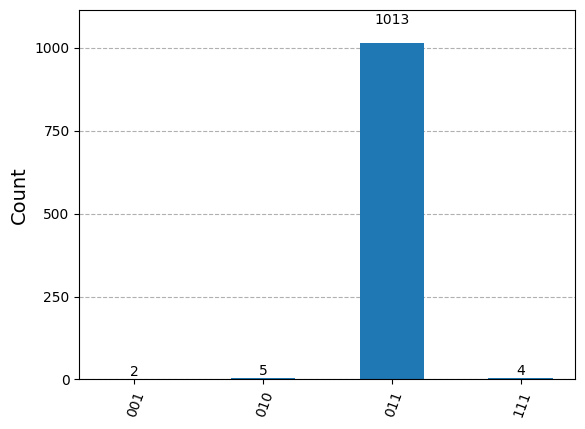

In [ ]:
# # Question 8 real quantum machine histogram plot
isa_circuit8 = pm.run(circ8)
with Session(backend = least_busy_backend) as session:
    sampler = Sampler()
    job = sampler.run([isa_circuit8], shots = 1024)
    print(job.status())
    print(job.result())
    counts8 = job.result()[0].data.c.get_counts()

plot_histogram(counts8)

QUEUED
PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=3>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2024-11-11 18:24:38', stop='2024-11-11 18:24:52', size=1024>)])}, 'version': 2})


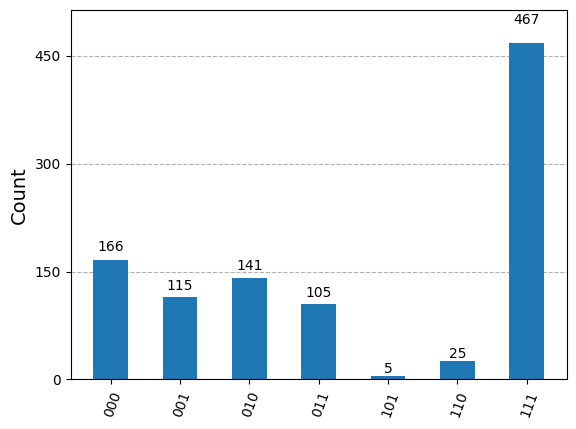

In [43]:
# Question 9 real quantum machine histogram plot
isa_circuit9 = pm.run(circ9)
with Session(backend = least_busy_backend) as session:
    sampler = Sampler()
    job = sampler.run([isa_circuit9], shots = 1024)
    print(job.status())
    print(job.result())
    counts9 = job.result()[0].data.c.get_counts()

plot_histogram(counts9)

QUEUED
PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=3>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2024-11-11 18:25:52', stop='2024-11-11 18:26:11', size=1024>)])}, 'version': 2})


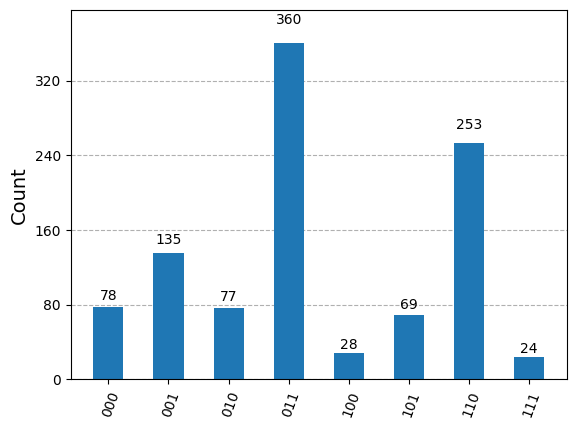

In [44]:
# Question 10 real quantum machine histogram plot
isa_circuit10 = pm.run(circ10)
with Session(backend = least_busy_backend) as session:
    sampler = Sampler()
    job = sampler.run([isa_circuit10], shots = 1024)
    print(job.status())
    print(job.result())
    counts10 = job.result()[0].data.c.get_counts()

plot_histogram(counts10)